<a href="https://colab.research.google.com/github/devanshkasaudhan/ML_projects/blob/main/Fine_tuning_of_inceptionV3_on_tomato_leaf_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Youtube video link

[reference from krish naik](https://youtu.be/chQNuV9B-Rw?si=r-gGCHLVBxEWuoqG)

## Downloading Kaggle dataset

https://www.kaggle.com/datasets/noulam/tomato

## Improved accuracy
- from (accuracy: 0.8854, val_accuracy: 0.8582)
- to (accuracy: 0.9320, val_accuracy: 0.9182)

[github to feature extraction of tomato leaf dataset](https://github.com/devanshkasaudhan/ML_projects/blob/main/transfer_learning_with_inceptionV3.ipynb)

In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download noulam/tomato
!unzip -q tomato.zip

100% 740M/743M [00:10<00:00, 185MB/s]
100% 743M/743M [00:10<00:00, 71.9MB/s]


In [8]:
!nvidia-smi

Fri Oct 20 16:30:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Importing Libraries

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [17]:
IMAGE_SIZE =[224, 224]

train_path ='/content/New Plant Diseases Dataset(Augmented)/train'
valid_path ='/content/New Plant Diseases Dataset(Augmented)/valid'

## creating an instance of the InceptionV3 model

In [21]:
inception = InceptionV3(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

In [22]:
for layer in inception.layers:
  print(layer.name)

input_3
conv2d_188
batch_normalization_188
activation_188
conv2d_189
batch_normalization_189
activation_189
conv2d_190
batch_normalization_190
activation_190
max_pooling2d_8
conv2d_191
batch_normalization_191
activation_191
conv2d_192
batch_normalization_192
activation_192
max_pooling2d_9
conv2d_196
batch_normalization_196
activation_196
conv2d_194
conv2d_197
batch_normalization_194
batch_normalization_197
activation_194
activation_197
average_pooling2d_18
conv2d_193
conv2d_195
conv2d_198
conv2d_199
batch_normalization_193
batch_normalization_195
batch_normalization_198
batch_normalization_199
activation_193
activation_195
activation_198
activation_199
mixed0
conv2d_203
batch_normalization_203
activation_203
conv2d_201
conv2d_204
batch_normalization_201
batch_normalization_204
activation_201
activation_204
average_pooling2d_19
conv2d_200
conv2d_202
conv2d_205
conv2d_206
batch_normalization_200
batch_normalization_202
batch_normalization_205
batch_normalization_206
activation_200
activa

In [23]:
# for layer in inception.layers:
#   layer.trainable=False

## allowing Hidden layers to train
Setting all layers trainable true from conv2d_273

In [29]:
inception.trainable = True

set_trainable = False

for layer in inception.layers:
  if layer.name == 'conv2d_273':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in inception.layers:
  print(layer.name,layer.trainable)

input_3 False
conv2d_188 False
batch_normalization_188 False
activation_188 False
conv2d_189 False
batch_normalization_189 False
activation_189 False
conv2d_190 False
batch_normalization_190 False
activation_190 False
max_pooling2d_8 False
conv2d_191 False
batch_normalization_191 False
activation_191 False
conv2d_192 False
batch_normalization_192 False
activation_192 False
max_pooling2d_9 False
conv2d_196 False
batch_normalization_196 False
activation_196 False
conv2d_194 False
conv2d_197 False
batch_normalization_194 False
batch_normalization_197 False
activation_194 False
activation_197 False
average_pooling2d_18 False
conv2d_193 False
conv2d_195 False
conv2d_198 False
conv2d_199 False
batch_normalization_193 False
batch_normalization_195 False
batch_normalization_198 False
batch_normalization_199 False
activation_193 False
activation_195 False
activation_198 False
activation_199 False
mixed0 False
conv2d_203 False
batch_normalization_203 False
activation_203 False
conv2d_201 False
c

In [30]:
folders = glob('/content/New Plant Diseases Dataset(Augmented)/train/*')
folders

['/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold']

In [31]:
x = Flatten()(inception.output)

## Making Custum Output Layer

In [32]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs= inception.input, outputs=prediction)

In [33]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_188 (Conv2D)         (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_188 (B  (None, 111, 111, 32)         96        ['conv2d_188[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_188 (Activation  (None, 111, 111, 32)         0         ['batch_normalization_18

In [39]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=1e-5),
    metrics=['accuracy']
)

## Train and test data Preprocessing

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen= ImageDataGenerator(rescale=1./255)

In [41]:
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size= (224,224),
                                                 batch_size=16,
                                                 class_mode='categorical')

Found 18345 images belonging to 10 classes.


In [42]:
test_set = test_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/valid',
                                                 target_size= (224,224),
                                                 batch_size=16,
                                                 class_mode='categorical')

Found 4585 images belonging to 10 classes.


## Fitting the model

In [44]:
r = model.fit(
    training_set,
    validation_data= test_set,
    epochs= 10,
    steps_per_epoch=len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/10
1147/1147 [==============================] - 260s 226ms/step - loss: 1.0874 - accuracy: 0.6383 - val_loss: 0.6959 - val_accuracy: 0.7631
Epoch 2/10
1147/1147 [==============================] - 265s 231ms/step - loss: 0.6090 - accuracy: 0.8003 - val_loss: 0.4946 - val_accuracy: 0.8384
Epoch 3/10
1147/1147 [==============================] - 255s 223ms/step - loss: 0.4671 - accuracy: 0.8462 - val_loss: 0.4035 - val_accuracy: 0.8680
Epoch 4/10
1147/1147 [==============================] - 255s 222ms/step - loss: 0.3917 - accuracy: 0.8718 - val_loss: 0.3664 - val_accuracy: 0.8752
Epoch 5/10
1147/1147 [==============================] - 256s 223ms/step - loss: 0.3400 - accuracy: 0.8877 - val_loss: 0.3232 - val_accuracy: 0.8892
Epoch 6/10
1147/1147 [==============================] - 256s 223ms/step - loss: 0.3047 - accuracy: 0.8971 - val_loss: 0.2932 - val_accuracy: 0.9003
Epoch 7/10
1147/1147 [==============================] - 256s 223ms/step - loss: 0.2771 - accuracy: 0.9073 - val_

## Improved accuracy
- from (accuracy: 0.8854, val_accuracy: 0.8582)
- to (accuracy: 0.9320, val_accuracy: 0.9182)

[github to feature extraction of tomato leaf dataset](https://github.com/devanshkasaudhan/ML_projects/blob/main/transfer_learning_with_inceptionV3.ipynb)

In [45]:
import matplotlib.pyplot as plt

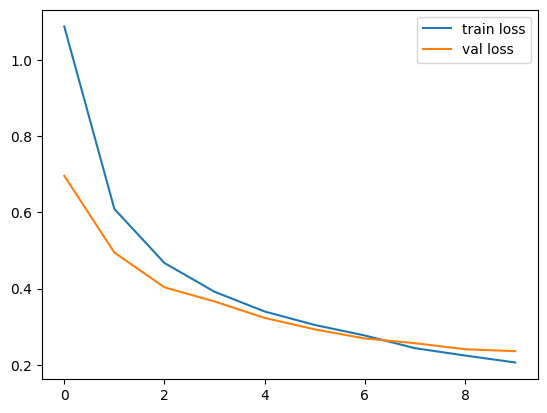

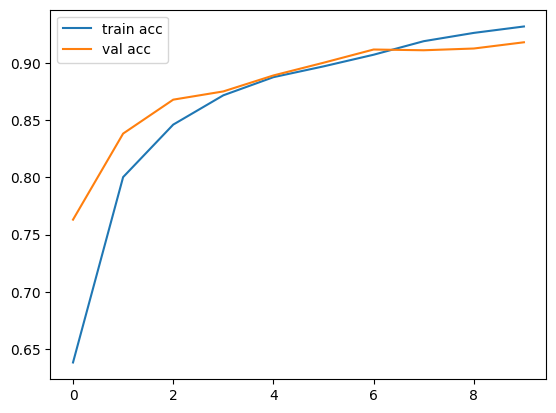

<Figure size 640x480 with 0 Axes>

In [46]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [47]:
# Define the image path
image_path = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Spider_mites Two-spotted_spider_mite/002835d1-c18e-4471-aa6e-8d8c29585e9b___Com.G_SpM_FL 8584.JPG'

# Load the image and resize it to match the input size of your model (224x224 in your case)
img = image.load_img(image_path, target_size=(224, 224))

# Convert the image to a NumPy array and preprocess it
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Rescale pixel values to [0, 1]

# Ensure that you are using the same preprocessing steps as you used during training


In [48]:
predictions = model.predict(img)


1/1 [==============================] - 2s 2s/step


In [49]:
predictions

array([[9.1183087e-05, 1.0945043e-03, 9.0240130e-05, 5.3640205e-04,
        1.6367134e-05, 9.7374117e-01, 1.1613981e-02, 5.5096080e-03,
        6.6993595e-03, 6.0710707e-04]], dtype=float32)